# 라이브러리

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 660 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638253 sha256=56d48370aca0176d865486e92ef4fe349680c5518a1c08ae6799192251882a30
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

# 한글 글꼴

In [3]:
#설치후 다시 시작해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (15.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 데이터 불러오기

In [4]:
pinkwink_web = pd.read_csv('/content/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date','hit'], index_col=0)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]

pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


# 시각화

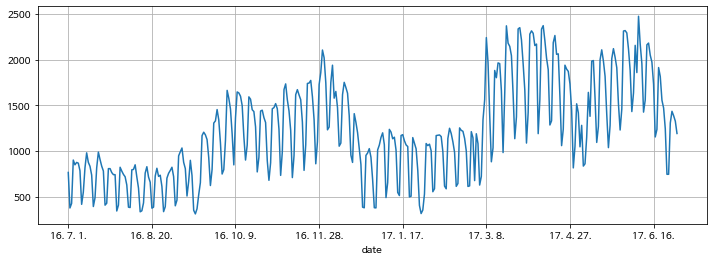

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

# 주기성?

In [6]:
time = np.arange(0,len(pinkwink_web))

time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
traffic = pinkwink_web['hit'].values

fx = np.linspace(0,time[-1],1000) #구간을 균등하게 나누는

In [8]:
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

시계열 그래프를 설명하는 간단한 함수를 찾는 과정

현재 데이터를 간단한 모델로 표현하는 과정(회귀, regression)

어떤 데이터를 모델로 표현하려고 하면 그 모델의 적합성을 확인하는 과정이 필요함

그래서 참값과 비교하여 에러를 계산

In [9]:
#에러함수 정의

def error(f,x,y):
    
    return np.sqrt(np.mean((f(x)-y)**2))

In [10]:
#1차, 2차, 3차 , 15차함수 정의

fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time,traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time,traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time,traffic,15)
f15 = np.poly1d(f15p)

In [11]:
print(error(f1,time,traffic))

430.8597308110963


In [12]:
print(error(f2,time,traffic))

430.6284101894695


In [13]:
print(error(f3,time,traffic))

429.53280466762925


In [14]:
print(error(f15,time,traffic))

330.47773021321143


그래프를 그려 시계열과 비교

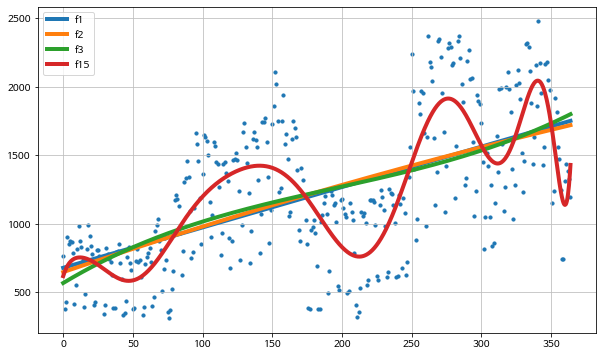

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(time,traffic,s=10)

plt.plot(fx,f1(fx), lw=4, label='f1')
plt.plot(fx,f2(fx), lw=4, label='f2')
plt.plot(fx,f3(fx), lw=4, label='f3')
plt.plot(fx,f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

2차나 3차로 표현할바에 차라리 1차로 표현하는게 낫다

15차가 잘 표현해주는건 맞지만 과적합일 수 있다

# prophet를 이용한 시계열 예측

In [16]:
#날짜와 방문수만 따로 저장

df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})

df.reset_index(inplace=True)

df['ds'] = pd.to_datetime(df['ds'], format = "%y. %m. %d.")

del df['date']

In [17]:
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [18]:
m = Prophet(yearly_seasonality = True) #연단위로 주기성이 있다

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods=60)

future.tail() #이후 60일간의 데이터를 예측하고 싶음

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [21]:
#예측 수행

forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,923.291666,723.125631,1135.652356
421,2017-08-26,508.365029,317.282590,708.785625
422,2017-08-27,640.847489,424.275978,852.307274
423,2017-08-28,1193.387766,996.497299,1402.898895
424,2017-08-29,1229.217425,1020.250591,1433.431085


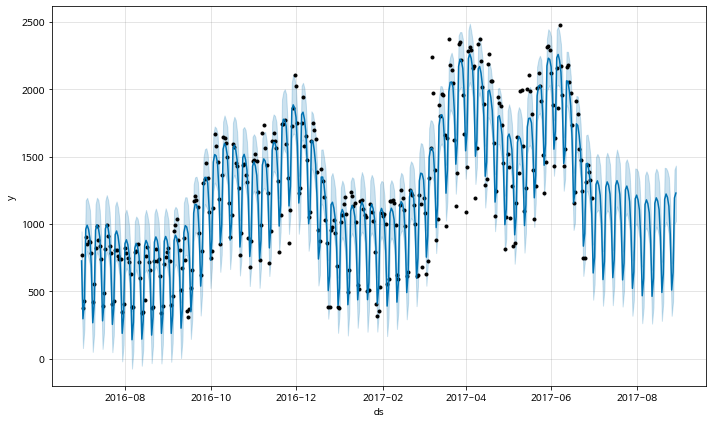

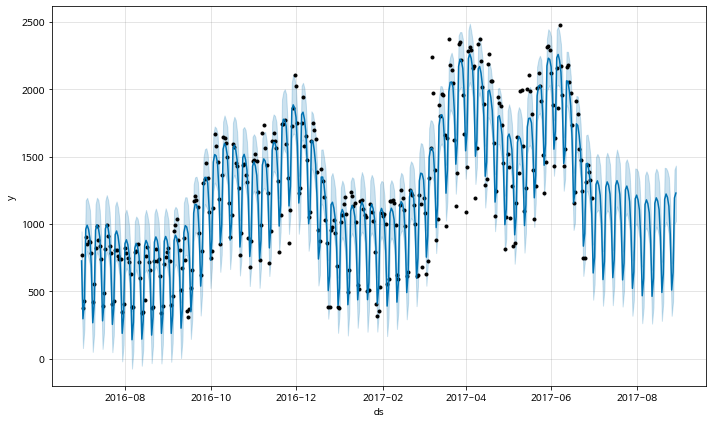

In [22]:
m.plot(forecast) #2017년 말 이후 2개월간 예측값

3월부터는 상승해서 7월쯤 내려가고, 다시 9월쯤부터 방문 수가 올라가기 시작

대학교 개강 후 중간고사, 기말고사, 방학과 주기가 비슷

대학교 공대 포스팅이 많아서 그럴 가능성이 높다

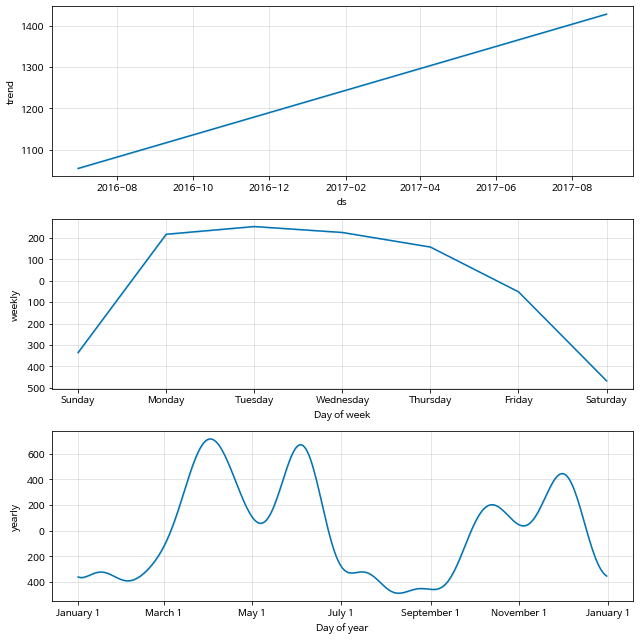

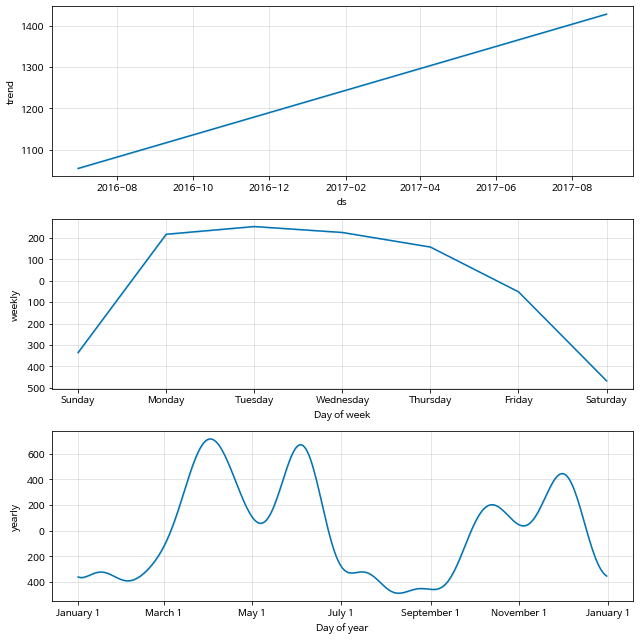

In [23]:
#추세성분, 계절성분..
m.plot_components(forecast)

# 3. 주식 데이터 분석

pandas의 DataReader는 주가 정보를 가져오는 함수

In [ ]:
!pip install pandas_datareader==0.10.0 #0.10.0을 하면 yahoo 다운 가능

In [6]:
import pandas_datareader as pdr

start = datetime(2003,1,1)
end = datetime(2017,6,30)

KIA = pdr.DataReader('000270.KS','yahoo',start,end)

In [7]:
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,0.0,6326.816895
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,6607.209961
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,6866.034668
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,6973.877930
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,6772.570312


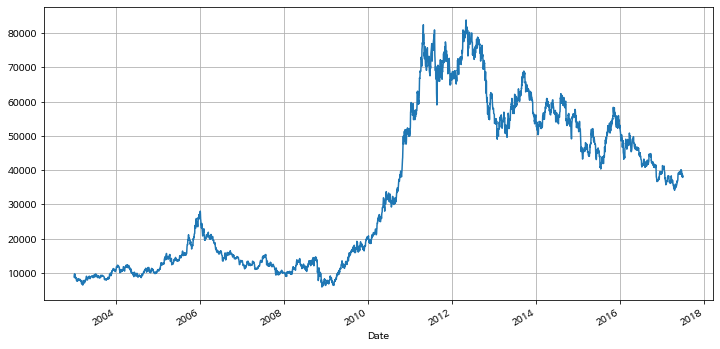

In [8]:
KIA['Close'].plot(figsize=(12,6),grid=True)

In [9]:
#참값과의 비교를 위해 일부 데이터를 자르고 해당 구간을 forecast

KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,0.0,6326.816895
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,6607.209961
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,6866.034668
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,6973.877930
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,6772.570312
...,...,...,...,...,...,...
2016-12-23,39350.0,38650.0,38700.0,39100.0,1070783.0,33386.179688
2016-12-26,39350.0,38850.0,39100.0,39000.0,465612.0,33300.800781
2016-12-27,39700.0,39050.0,39050.0,39500.0,879686.0,33727.726562


In [10]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})

df.reset_index(inplace=True)

del df['Date']

df.head()

,ds,y
0,2003-01-01,8800.0
1,2003-01-02,9190.0
2,2003-01-03,9550.0
3,2003-01-06,9700.0
4,2003-01-07,9420.0


In [11]:
#1년 후 2017년 12월 31일까지의 정보를 예측

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3880,2017-12-25
3881,2017-12-26
3882,2017-12-27
3883,2017-12-28
3884,2017-12-29


In [14]:
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3880,2017-12-25,34703.336110,24936.088848,43874.106810
3881,2017-12-26,34744.049829,24070.598643,43915.082858
3882,2017-12-27,34698.389688,24862.528398,43718.654939
3883,2017-12-28,34647.328186,24637.230106,44399.829369
3884,2017-12-29,34561.101110,24814.664862,44237.814325


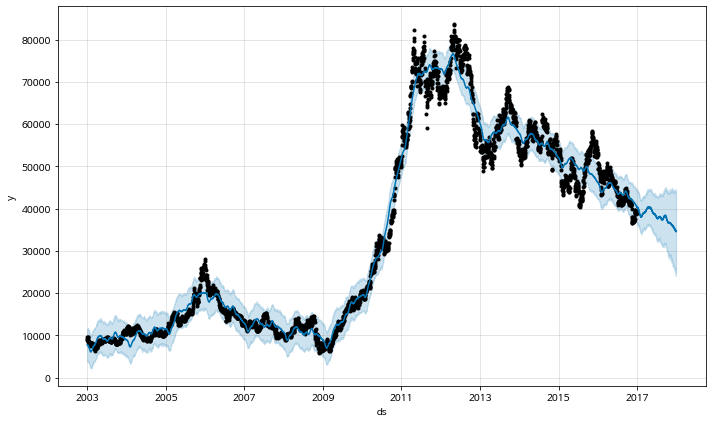

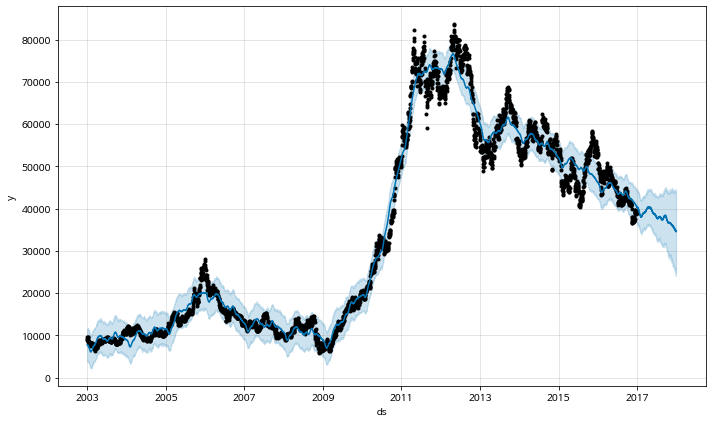

In [17]:
m.plot(forecast) #예측값

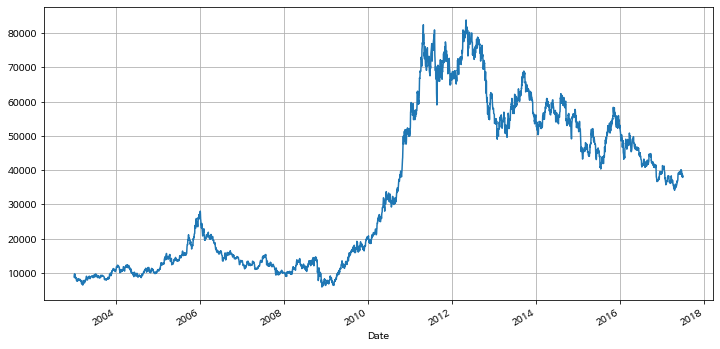

In [18]:
KIA['Close'].plot(figsize=(12,6),grid=True) #실제값

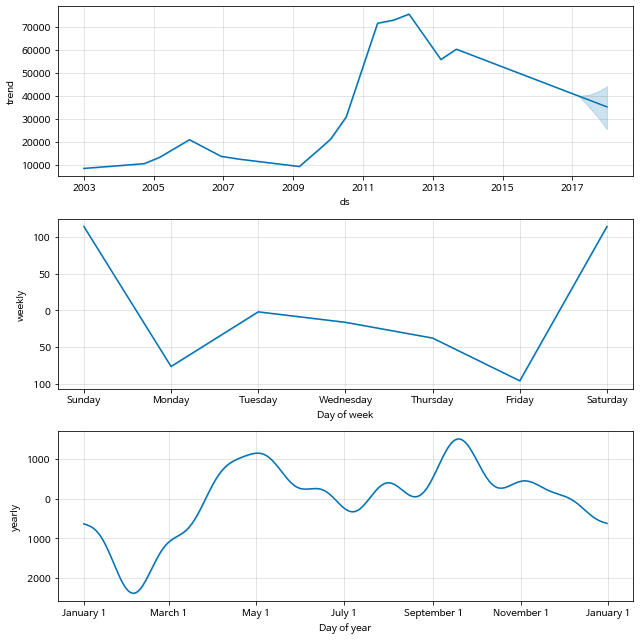

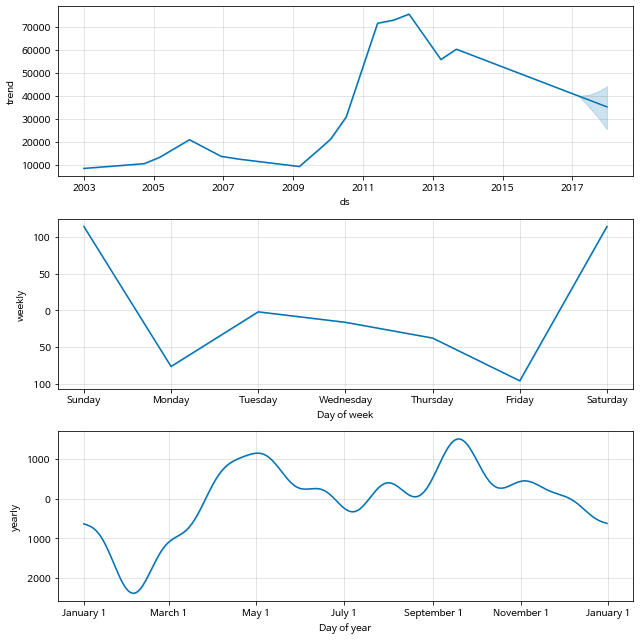

In [19]:
m.plot_components(forecast)

In [20]:
#주가를 가져오는 날짜를 바꿔서 다시 예측해보기

start = datetime(2014,1,1)
end = datetime(2017,7,31)

KIA = pdr.DataReader('000270.KS','yahoo',start,end)

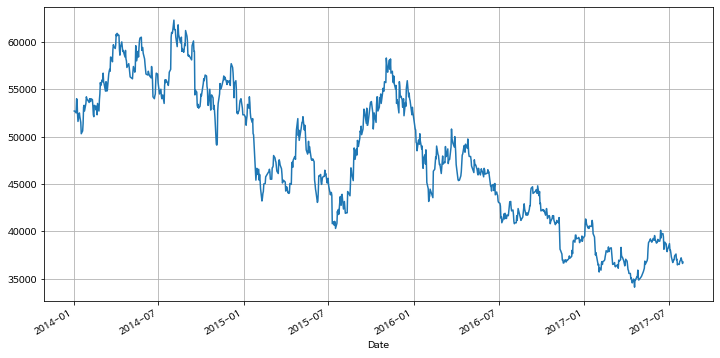

In [21]:
KIA['Close'].plot(figsize=(12,6),grid=True)

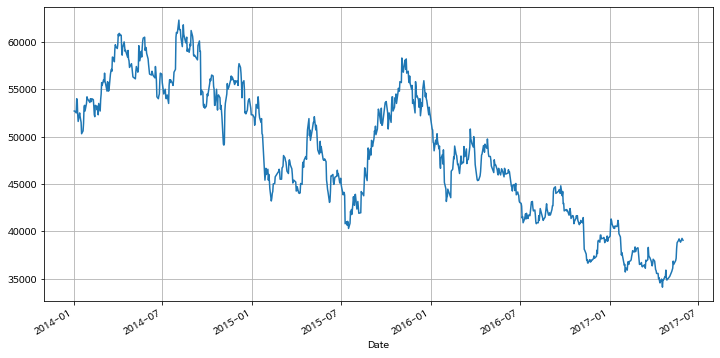

In [22]:
#train 데이터

KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6),grid=True)

In [23]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})

df.reset_index(inplace=True)

del df['Date']

In [24]:
#나머지 61일간 데이터 예측

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


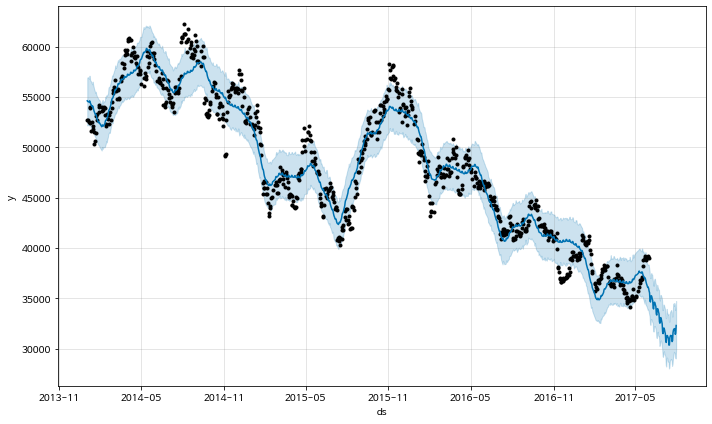

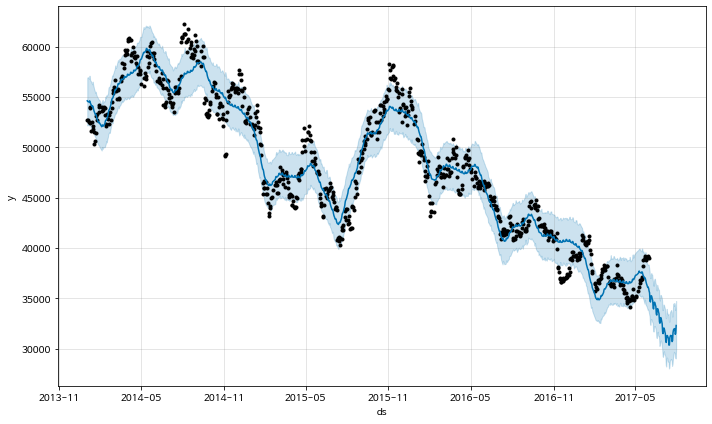

In [27]:
#그래프로 확인

forecast=m.predict(future)

m.plot(forecast)

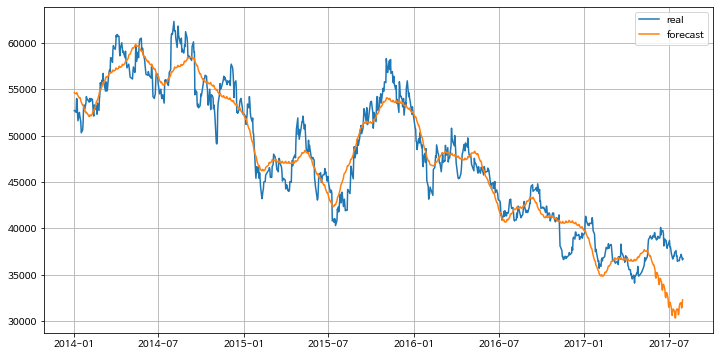

In [28]:
#실제 값과의 비교

plt.figure(figsize=(12,6))

plt.plot(KIA.index, KIA['Close'],label='real')

plt.plot(forecast['ds'],forecast['yhat'], label='forecast')

plt.grid()
plt.legend()
plt.show()

# 4. growth model, holiday forecast

In [29]:
df = pd.read_csv('/content/08. example_wp_R.csv')
df['y'] = np.log(df['y']) #로그변환했는데?

In [30]:
df['cap'] = 8.5

In [31]:
m = Prophet(growth = 'logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


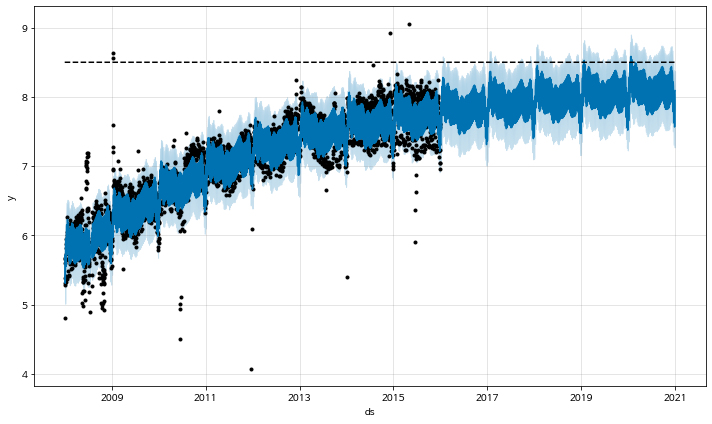

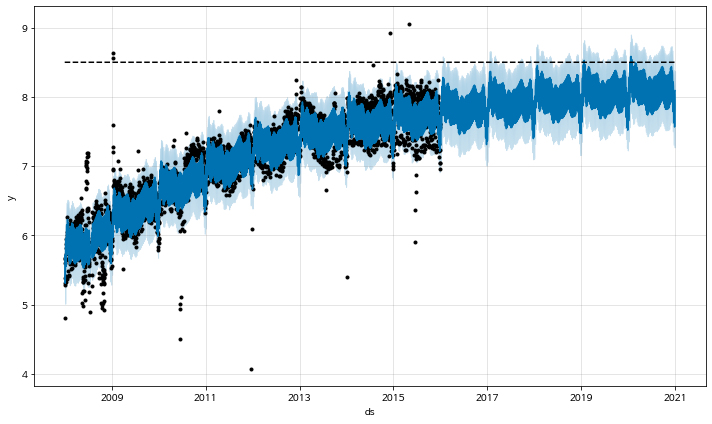

In [32]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

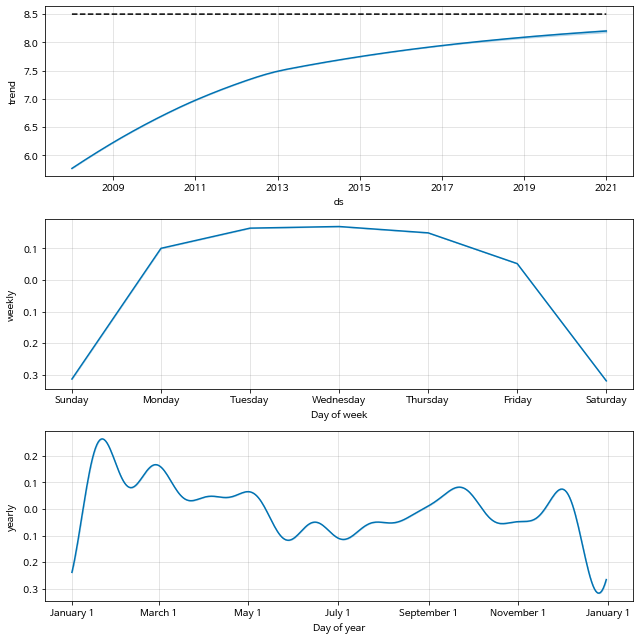

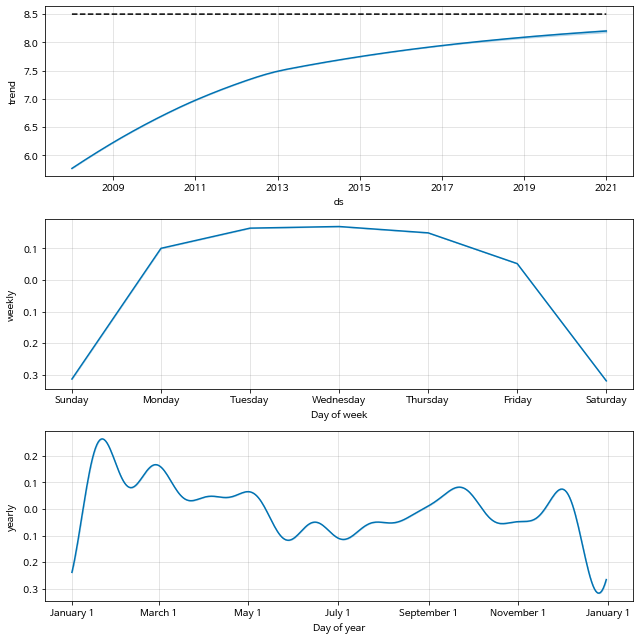

In [34]:
forecast = m.predict(future)
m.plot_components(forecast)

# holiday forecast

In [35]:
df = pd.read_csv('/content/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])

m = Prophet(daily_seasonality = True)
m.fit(df)

future = m.make_future_dataframe(periods=366)

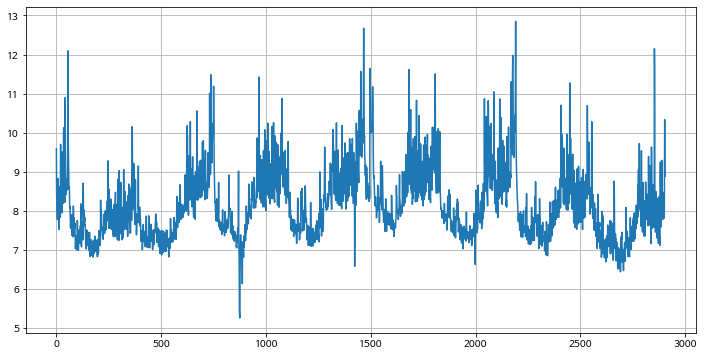

In [36]:
df.y.plot(figsize=(12,6),grid=True)

In [37]:
playoffs = pd.DataFrame({
    'holiday':'playoff',
    'ds':pd.to_datetime(['2008-01-13','2009-01-03','2010-01-16',
                         '2010-01-24','2010-02-07','2011-01-08',
                         '2013-01-12','2014-01-12','2014-01-19',
                         '2014-02-02','2015-01-11','2016-01-17',
                         '2016-01-24','2016-02-07']),
    'lower_window':0,
    'upper_window':1
})

superbowls = pd.DataFrame({
    'holiday':'superbowl',
    'ds':pd.to_datetime(['2010-02-07','2014-02-02','2016-02-07']),
    'lower_window':0,
    'upper_window':1
})

holidays = pd.concat((playoffs, superbowls))

In [39]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [40]:
forecast[(forecast['playoff']*forecast['superbowl']).abs()>0][['ds','playoff','superbowl']][-10:]

,ds,playoff,superbowl
750,2010-02-07,1.223285,1.203237
2190,2014-02-02,1.223285,1.203237
2191,2014-02-03,1.901414,1.463645
2922,2016-02-07,1.223285,1.203237
2923,2016-02-08,1.901414,1.463645


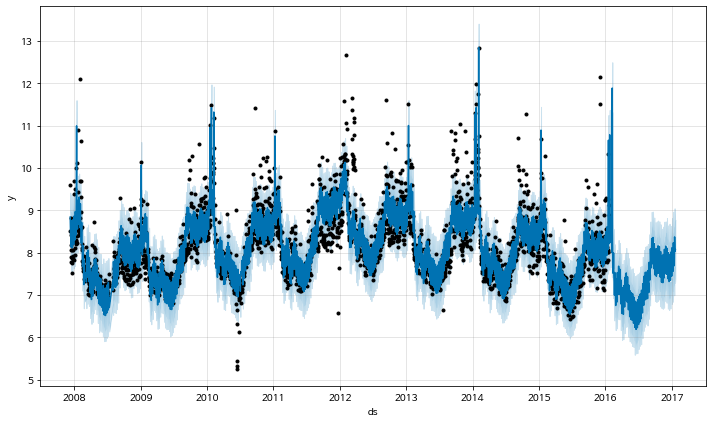

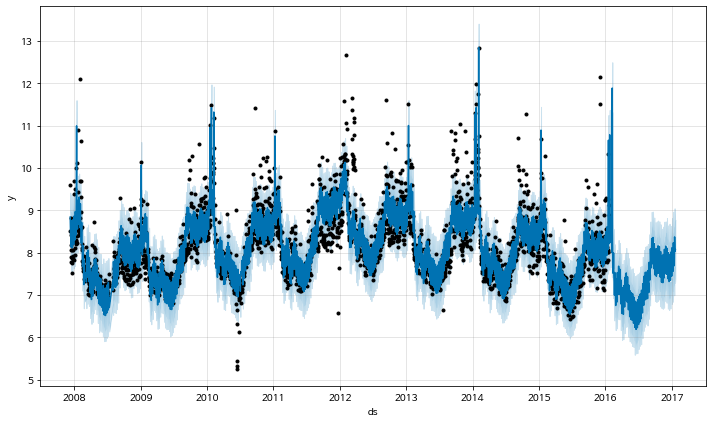

In [41]:
m.plot(forecast)

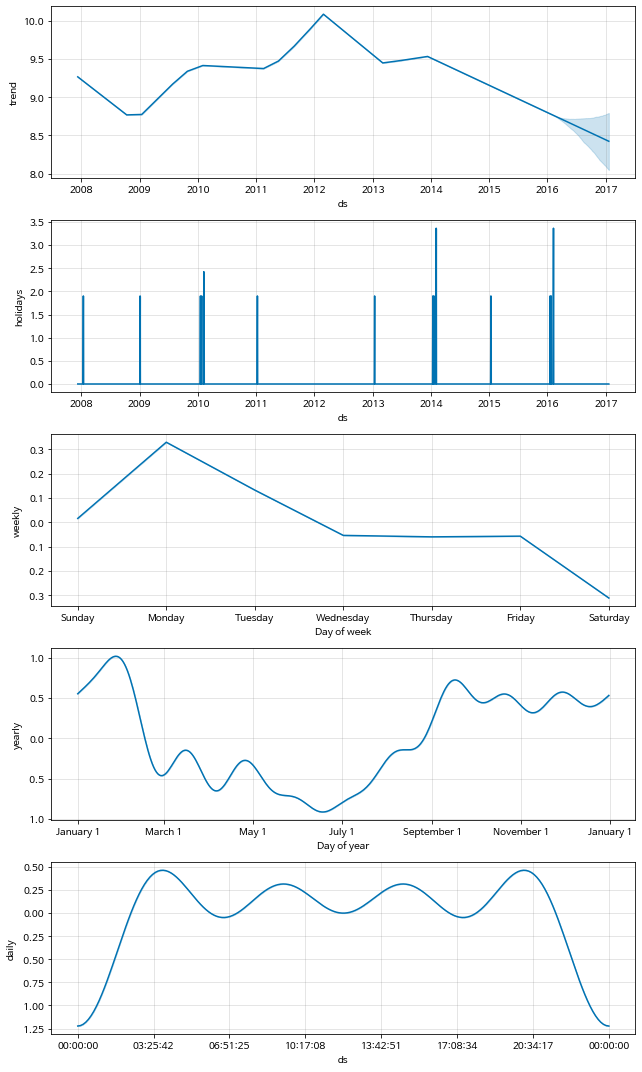

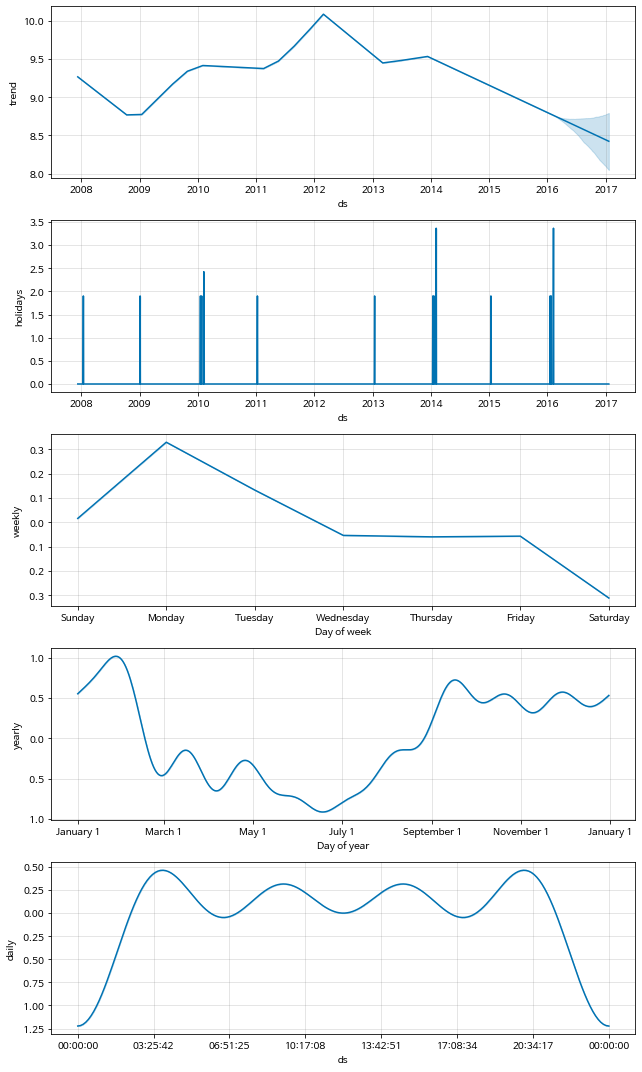

In [42]:
m.plot_components(forecast)